In [3]:
#Histogram Equalization
from __future__ import print_function
import cv2 as cv
import argparse

src = cv.imread('D:/Projects/CV2/Image-Processing/Basic/dog.jpg')

src = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

dst = cv.equalizeHist(src)

cv.imshow('Source image', src)
cv.imshow('Equalized Image', dst)

cv.waitKey()

-1

**Histogram Calculation**

C:\Users\Admin\AppData\Local\Temp\ipykernel_1944\2789635985.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
C:\Users\Admin\AppData\Local\Temp\ipykernel_1944\2789635985.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ( bin_w*(i), hist_h - int(b_hist[i]) ),
C:\Users\Admin\AppData\Local\Temp\ipykernel_1944\2789635985.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv.line(histImage, ( bin_w*

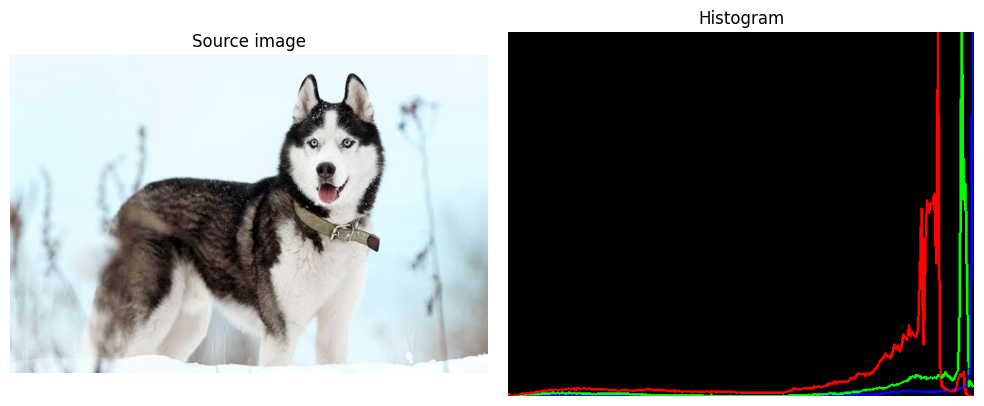

In [ ]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse

src = cv.imread('D:/Projects/CV2/Image-Processing/Basic/dog.jpg')

bgr_planes = cv.split(src)

histSize = 256

histRange = (0, 256) # the upper boundary is exclusive

accumulate = False

b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)

hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)

for i in range(1, histSize):
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(b_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(b_hist[i]) ),
            ( 255, 0, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(g_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(g_hist[i]) ),
            ( 0, 255, 0), thickness=2)
    cv.line(histImage, ( bin_w*(i-1), hist_h - int(r_hist[i-1]) ),
            ( bin_w*(i), hist_h - int(r_hist[i]) ),
            ( 0, 0, 255), thickness=2)

#cv.imshow('Source image', src)
#cv.imshow('calcHist Demo', histImage)
#cv.waitKey()

src_rgb = cv.cvtColor(src, cv.COLOR_BGR2RGB)
histImage_rgb = cv.cvtColor(histImage, cv.COLOR_BGR2RGB)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title('Source image')
plt.imshow(src_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Histogram')
plt.imshow(histImage_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()

In [1]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse

src_base = cv.imread('img1.jpg')
src_test1 = cv.imread('img2.jpg')
src_test2 = cv.imread('img3.jpg')
if src_base is None or src_test1 is None or src_test2 is None:
    print('Could not open or find the images!')
    exit(0)

hsv_base = cv.cvtColor(src_base, cv.COLOR_BGR2HSV)
hsv_test1 = cv.cvtColor(src_test1, cv.COLOR_BGR2HSV)
hsv_test2 = cv.cvtColor(src_test2, cv.COLOR_BGR2HSV)

hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]

h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]

# hue varies from 0 to 179, saturation from 0 to 255
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists

# Use the 0-th and 1-st channels
channels = [0, 1]

hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

hist_half_down = cv.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

hist_test1 = cv.calcHist([hsv_test1], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

hist_test2 = cv.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

for compare_method in range(4):
    base_base = cv.compareHist(hist_base, hist_base, compare_method)
    base_half = cv.compareHist(hist_base, hist_half_down, compare_method)
    base_test1 = cv.compareHist(hist_base, hist_test1, compare_method)
    base_test2 = cv.compareHist(hist_base, hist_test2, compare_method)

    print('Method:', compare_method, 'Perfect, Base-Half, Base-Test(1), Base-Test(2) :',\
          base_base, '/', base_half, '/', base_test1, '/', base_test2)

Method: 0 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 1.0 / 0.8804378909321253 / 0.20456957916644988 / 0.06645469207841917
Method: 1 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 0.0 / 4.683398596781899 / 2697.981816285168 / 4763.802716950668
Method: 2 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 18.89466189595987 / 13.02202540662256 / 5.440850785933435 / 2.581731025740737
Method: 3 Perfect, Base-Half, Base-Test(1), Base-Test(2) : 0.0 / 0.2378872114442253 / 0.6798259690477988 / 0.8741730476292865


**Back Projection**

In [ ]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import argparse

def Hist_and_Backproj(val):

    bins = val
    histSize = max(bins, 2)
    ranges = [0, 180] # hue_range

    hist = cv.calcHist([hue], [0], None, [histSize], ranges, accumulate=False)
    cv.normalize(hist, hist, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

    backproj = cv.calcBackProject([hue], [0], hist, ranges, scale=1)

    cv.imshow('BackProj', backproj)

    w = 400
    h = 400
    bin_w = int(round(w / histSize))
    histImg = np.zeros((h, w, 3), dtype=np.uint8)

    for i in range(bins):
        cv.rectangle(histImg, (i*bin_w, h), ( (i+1)*bin_w, h - int(np.round( hist[i]*h/255.0 )) ), (0, 0, 255), cv.FILLED)

    cv.imshow('Histogram', histImg)

img = cv.imread('D:/Projects/CV2/Image-Processing/Transformations/balls.jpg')
#src = cv.imread('img1.jpg')
src = cv.resize(img, (400, 400))

hsv = cv.cvtColor(src, cv.COLOR_BGR2HSV)

ch = (0, 0)
hue = np.empty(hsv.shape, hsv.dtype)
cv.mixChannels([hsv], [hue], ch)

window_image = 'Source image'
cv.namedWindow(window_image)
bins = 25
cv.createTrackbar('* Hue  bins: ', window_image, bins, 180, Hist_and_Backproj )
Hist_and_Backproj(bins)

cv.imshow(window_image, src)
cv.waitKey()
cv.destroyAllWindows()

C:\Users\Admin\AppData\Local\Temp\ipykernel_12024\3672466697.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv.rectangle(histImg, (i*bin_w, h), ( (i+1)*bin_w, h - int(np.round( hist[i]*h/255.0 )) ), (0, 0, 255), cv.FILLED)


**Template Matching**

In [19]:
from __future__ import print_function
import cv2 as cv

image_path = 'D:/Projects/CV2/Image-Processing/Basic/dog.jpg'
template_path = 'dog_templ.jpg'
mask_path = None 

use_mask = mask_path is not None
img = cv.imread(image_path, cv.IMREAD_COLOR)
templ = cv.imread(template_path, cv.IMREAD_COLOR)
mask = cv.imread(mask_path, cv.IMREAD_COLOR) if use_mask else None

image_window = "Source Image"
result_window = "Result window"
match_method = 0
max_Trackbar = 5

def MatchingMethod(param):
    global match_method
    match_method = param

    img_display = img.copy()

    method_accepts_mask = (cv.TM_SQDIFF == match_method or match_method == cv.TM_CCORR_NORMED)
    if use_mask and method_accepts_mask:
        result = cv.matchTemplate(img, templ, match_method, None, mask)
    else:
        result = cv.matchTemplate(img, templ, match_method)

    cv.normalize(result, result, 0, 1, cv.NORM_MINMAX, -1)
    _minVal, _maxVal, minLoc, maxLoc = cv.minMaxLoc(result, None)
    matchLoc = minLoc if match_method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else maxLoc

    cv.rectangle(img_display, matchLoc, 
                 (matchLoc[0] + templ.shape[1], matchLoc[1] + templ.shape[0]), 
                 (0, 0, 0), 2, 8, 0)
    cv.rectangle(result, matchLoc, 
                 (matchLoc[0] + templ.shape[1], matchLoc[1] + templ.shape[0]), 
                 (0, 0, 0), 2, 8, 0)

    cv.imshow(image_window, img_display)
    cv.imshow(result_window, result)

def main():
    if img is None or templ is None or (use_mask and mask is None):
        print("Не вдалося завантажити зображення або шаблон.")
        return

    cv.namedWindow(image_window, cv.WINDOW_AUTOSIZE)
    cv.namedWindow(result_window, cv.WINDOW_AUTOSIZE)

    trackbar_label = 'Method: \n 0: SQDIFF \n 1: SQDIFF NORMED \n 2: TM CCORR \n 3: TM CCORR NORMED \n 4: TM COEFF \n 5: TM COEFF NORMED'
    cv.createTrackbar(trackbar_label, image_window, match_method, max_Trackbar, MatchingMethod)

    MatchingMethod(match_method)
    cv.waitKey(0)

if __name__ == "__main__":
    main()


In [ ]:
from __future__ import print_function
import cv2 as cv

image_path = 'D:/Projects/CV2/Image-Processing/Basic/dog.jpg'
template_path = 'dog_templ.jpg'

img = cv.imread(image_path, cv.IMREAD_COLOR)
templ = cv.imread(template_path, cv.IMREAD_COLOR)

result = cv.matchTemplate(img, templ, cv.TM_CCOEFF_NORMED)#тут я просто змінював значення

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

best_match = max_loc

cv.rectangle(img, best_match, 
             (best_match[0] + templ.shape[1], best_match[1] + templ.shape[0]), 
             (0, 255, 0), 2)

cv.imshow('result', img)
cv.waitKey(0)
cv.destroyAllWindows()